# This is Feature Engineering Module.

* Objectives of this module includes creating new effective features based on our scraped features

In [1248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# view additional data frame columns
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

## Developing new features and consolidating sparse classes into a one single classes.

In [1249]:
# Use arithmetic to construct new features 
df['Нас'] = 2024 - df['Ашиглалтанд орсон он:']

# Check for improper data values
df['Нас'].describe()

count    5276.000000
mean        7.496399
std         9.062635
min        -1.000000
25%         1.000000
50%         5.000000
75%        10.000000
max        44.000000
Name: Нас, dtype: float64

In [1250]:
# Determine the number of observations that have descrepancies
df['Нас'].lt(0).sum()

39

In [1251]:
# Remove observations that are negative in property age
df = df[df['Нас'] >= 0]

# review the remaining observations
df.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Нас
0,84.000,"Хан-Уул, Viva city",Паркет,0,2013,0,Вакум,5,Бүргэд,30.50,5,0,2,1,11
1,115.000,"Хан-Уул, 19-р хороолол",Паркет,1,1990,0,Вакум,5,Бүргэд,16.00,5,0,2,1,34
2,510.000,"Баянзүрх, Чингис зочид буудал",Паркет,1,2010,0,Вакум,10,Бүргэд,150.00,10,0,5,1,14
3,107.946,"Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,0,Вакум,12,Вакум,39.98,2,0,2,1,3
4,521.370,"Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,1,Вакум,16,Бүргэд,115.86,7,0,5,1,8


In [1252]:
df['үнэ'].describe()

count    5237.000000
mean      298.195348
std       183.331227
min        45.000000
25%       160.000000
50%       236.900000
75%       395.000000
max       880.000000
Name: үнэ, dtype: float64

In [1253]:
# Let's create a new feature called "District", in order to have an easier to work with data.

# Extract district by splitting the address on the comma and taking the first part
df['Дүүрэг'] = df['хаяг'].str.split(',', expand=True)[0].str.strip()
df = df[df['Дүүрэг'].str.startswith('УБ —')]
df['Дүүрэг'] = df['Дүүрэг'].str.replace('УБ - ', '')

df['хаяг'] = df['хаяг'].str.split(',', n=1).str[1].str.strip()

df['хаяг'] = df['хаяг'].fillna(0)
df.shape


(0, 16)

In [1254]:
df['Хаалга:'].value_counts()


Series([], Name: count, dtype: int64)

In [1255]:
#consolidate sparse classes into a one class
df['Хаалга:'].replace(to_replace=['Төмөр вакум', 'Төмөр'], value='Төмөр', inplace=True)
df['Хаалга:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3435/4130607074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Хаалга:'].replace(to_replace=['Төмөр вакум', 'Төмөр'], value='Төмөр', inplace=True)


Series([], Name: count, dtype: int64)

In [1256]:
#list classes to be replaced as other

other_roofs = ['Мод', 'Вакум']

# consolidate into the 'Other' class
df['Хаалга:'].replace(other_roofs, 'Бусад', inplace=True)
df['Хаалга:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3435/702916260.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Хаалга:'].replace(other_roofs, 'Бусад', inplace=True)


Series([], Name: count, dtype: int64)

In [1257]:
df['Шал:'].value_counts()

Series([], Name: count, dtype: int64)

In [1258]:
other_windows = ['Ламинат', 'Мод', 'Цемент', 'Плита', 'Чулуу']

# consolidate into the 'Other' class
df['Шал:'].replace(other_windows, 'Бусад', inplace=True)
df['Шал:'].value_counts()


/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3435/3590597469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Шал:'].replace(other_windows, 'Бусад', inplace=True)


Series([], Name: count, dtype: int64)

In [1259]:
df['Цонх:'].value_counts()

Series([], Name: count, dtype: int64)

In [1260]:
other_windows = ['Төмөр вакум', 'Модон вакум', 'Мод']

# consolidate into the 'Other' class
df['Цонх:'].replace(other_windows, 'Бусад', inplace=True)
df['Цонх:'].value_counts()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3435/185545625.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Цонх:'].replace(other_windows, 'Бусад', inplace=True)


Series([], Name: count, dtype: int64)

In [1261]:
df['Цонхны тоо:'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Цонхны тоо:, dtype: float64

## Remove Unused

Remove unused or redundant columns from the table

* Now given that we've created a new Property age feature we can remove property year feature.

In [1262]:
df = df.drop(columns=['Ашиглалтанд орсон он:'])
df.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Нас,Дүүрэг


In [1263]:
df.shape

(0, 15)

In [1264]:
hanuul = df[df['Дүүрэг'] == 'УБ — Хан-Уул']

# Calculate the mean prices for each address
mean_prices = hanuul.groupby('хаяг')['үнэ'].mean().reset_index()
mean_prices.columns = ['Address', 'MeanPrice']

# Sort the data for better visualization
mean_prices = mean_prices.sort_values(by='MeanPrice', ascending=False)
hanuul.shape

(0, 15)

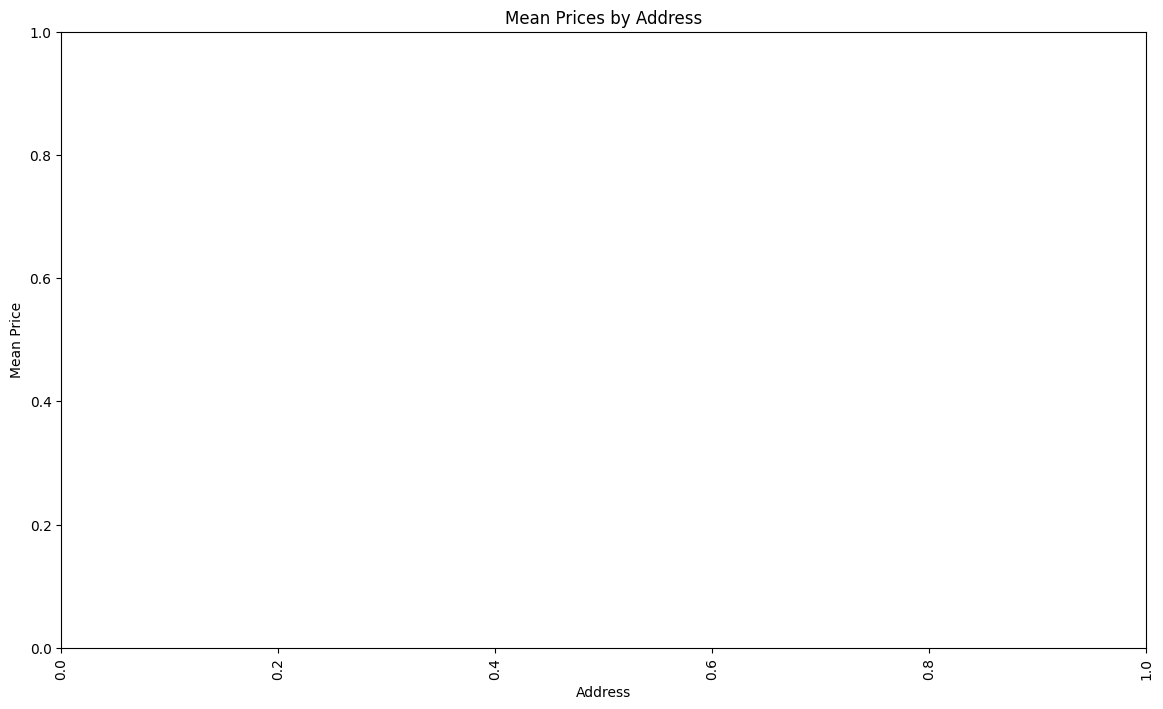

In [1265]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x='Address', y='MeanPrice', data=mean_prices)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Mean Prices by Address')
plt.xlabel('Address')
plt.ylabel('Mean Price')

# Display the plot
plt.show()

In [1266]:
bin_edges = [mean_prices['MeanPrice'].min(), mean_prices['MeanPrice'].quantile(0.25), mean_prices['MeanPrice'].quantile(0.75), mean_prices['MeanPrice'].max()]

# Cut the data into three bins based on the custom bin edges
mean_prices['Category'] = pd.cut(mean_prices['MeanPrice'], bins=bin_edges, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Set the categories for the 'Category' column in mean_prices
mean_prices['Category'] = mean_prices['Category'].cat.set_categories(['Low', 'Medium', 'High', 'Not Khan-Uul'])


# Plot the categorized data
plt.figure(figsize=(14, 8))

# Create the bar plot with colors based on categories
sns.barplot(x='Address', y='MeanPrice', hue='Category', data=mean_prices, dodge=False, palette='viridis')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Mean Prices by Address with Categories')
plt.xlabel('Address')
plt.ylabel('Mean Price')

# Display the legend
plt.legend(title='Category')

# Display the plot
plt.show()

ValueError: bins must increase monotonically.

In [ ]:
df.shape

(5237, 15)

In [ ]:
df.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Нас,Дүүрэг
0,84.000,Viva city,Паркет,0,0,Вакум,5,Бүргэд,30.50,5,0,2,1,11,УБ — Хан-Уул
1,115.000,19-р хороолол,Паркет,1,0,Вакум,5,Бүргэд,16.00,5,0,2,1,34,УБ — Хан-Уул
2,510.000,Чингис зочид буудал,Паркет,1,0,Вакум,10,Бүргэд,150.00,10,0,5,1,14,УБ — Баянзүрх
3,107.946,"Хан-Уул, Хороо 16",Паркет,0,0,Вакум,12,Бусад,39.98,2,0,2,1,3,УБ — Хан-Уул
4,521.370,"Баянзүрх, Хороо 26",Паркет,2,1,Вакум,16,Бүргэд,115.86,7,0,5,1,8,УБ — Баянзүрх


In [ ]:
df['үнэ'].describe()

count    5237.000000
mean      298.195348
std       183.331227
min        45.000000
25%       160.000000
50%       236.900000
75%       395.000000
max       880.000000
Name: үнэ, dtype: float64

In [ ]:
df['хаяг'].describe()

count       5237
unique       248
top       Яармаг
freq         502
Name: хаяг, dtype: object

In [ ]:
df = df[df['хаяг'] != 0]
df.shape

(5132, 15)

In [ ]:

mean_prices = df.groupby(['Дүүрэг', 'хаяг'])['үнэ'].mean().reset_index(name='MeanPrice')
pd.reset_option('display.max_rows')
mean_prices[mean_prices['хаяг'] == '1-р хороолол']

,Дүүрэг,хаяг,MeanPrice
113,УБ — Сонгинохайрхан,1-р хороолол,161.764462


In [ ]:
# Define a function to categorize each district
def categorize_district(district_df):
    Q1 = district_df['MeanPrice'].quantile(0.25)
    Q3 = district_df['MeanPrice'].quantile(0.75)
    min_val = district_df['MeanPrice'].min()
    max_val = district_df['MeanPrice'].max()
    
    bins = [min_val, Q1, Q3, max_val]
    
    # Ensure bin edges are unique
    if len(set(bins)) < len(bins):
        district_df['Category'] = 'Medium'  # Default category if bin edges are not unique
    else:
        labels = ['Low', 'Medium', 'High']
        district_df['Category'] = pd.cut(district_df['MeanPrice'], bins=bins, labels=labels, include_lowest=True)
    
    return district_df

# Apply the function to each district
categorized_mean_prices = mean_prices.groupby('Дүүрэг').apply(categorize_district)
categorized_mean_prices



/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3435/3600491394.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categorized_mean_prices = mean_prices.groupby('Дүүрэг').apply(categorize_district)


Дүүрэг                хаяг   MeanPrice Category
Дүүрэг                                                                     
УБ — Багануур  0     УБ — Багануур   Багануур, Хороо 3  150.000000   Medium
УБ — Баянгол   1      УБ — Баянгол       10-р хороолол  162.101981      Low
               2      УБ — Баянгол      25-р эмийн сан  173.897308   Medium
               3      УБ — Баянгол       3, 4 хороолол  175.402758   Medium
               4      УБ — Баянгол        4-р хороолол  211.000000   Medium
...                            ...                 ...         ...      ...
УБ — Чингэлтэй 242  УБ — Чингэлтэй  Чингэлтэй, Хороо 3  387.015000   Medium
               243  УБ — Чингэлтэй  Чингэлтэй, Хороо 4  347.100000   Medium
               244  УБ — Чингэлтэй  Чингэлтэй, Хороо 5  240.083333   Medium
               245  УБ — Чингэлтэй  Чингэлтэй, Хороо 6  304.500000   Medium
               246  УБ — Чингэлтэй  Чингэлтэй, Хороо 9  175.929600      Low

[247 rows x 4 columns]

In [ ]:
# Merge the categories back to the original dataframe
a = df.merge(categorized_mean_prices[['хаяг', 'Category']], on='хаяг', how='left')

a.shape

(5132, 16)

In [ ]:
a = a[a['Хэдэн давхарт:'] > 0]

# Create the new feature 'floor_ratio'
a['floor_ratio'] = a['Хэдэн давхарт:'] / a['Барилгын давхар:']

## Do one-hot encoder for categorical values

In [ ]:
a['Цонх:'].unique()

array(['Вакум', 'Бусад'], dtype=object)

In [ ]:
a.head()

,үнэ,хаяг,Шал:,Тагт:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Нас,Дүүрэг,Category,floor_ratio
0,84.000,Viva city,Паркет,0,0,Вакум,5,Бүргэд,30.50,5,0,2,1,11,УБ — Хан-Уул,Low,1.000000
1,115.000,19-р хороолол,Паркет,1,0,Вакум,5,Бүргэд,16.00,5,0,2,1,34,УБ — Хан-Уул,Medium,1.000000
2,510.000,Чингис зочид буудал,Паркет,1,0,Вакум,10,Бүргэд,150.00,10,0,5,1,14,УБ — Баянзүрх,High,1.000000
3,107.946,"Хан-Уул, Хороо 16",Паркет,0,0,Вакум,12,Бусад,39.98,2,0,2,1,3,УБ — Хан-Уул,Low,0.166667
4,521.370,"Баянзүрх, Хороо 26",Паркет,2,1,Вакум,16,Бүргэд,115.86,7,0,5,1,8,УБ — Баянзүрх,High,0.437500


In [ ]:
a = pd.get_dummies(a, columns=['Цонх:', 'Дүүрэг', 'Хаалга:', 'Шал:', 'Category'])
a.filter(like='Дүүрэг').head(5)

,Дүүрэг_УБ — Багануур,Дүүрэг_УБ — Баянгол,Дүүрэг_УБ — Баянзүрх,Дүүрэг_УБ — Налайх,Дүүрэг_УБ — Сонгинохайрхан,Дүүрэг_УБ — Сүхбаатар,Дүүрэг_УБ — Хан-Уул,Дүүрэг_УБ — Чингэлтэй
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False


In [ ]:
a.shape

(5132, 30)

In [ ]:
a.to_csv('training_data.csv')